### 准备Python运行环境

In [ ]:
! pip install networkx
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install tqdm

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import networkx as nx

### 班级好友网络

班级好友网络来自于 2021 年硕士生课程所有学生之间的好友关系。

In [3]:
input_data = pd.read_csv('friends210914.csv', index_col=0)
DG_friends = nx.DiGraph(input_data.T.values)  # directed graph
G_friends = nx.Graph(input_data.values)  # undirected graph
print(nx.info(DG_friends))

DiGraph with 43 nodes and 218 edges


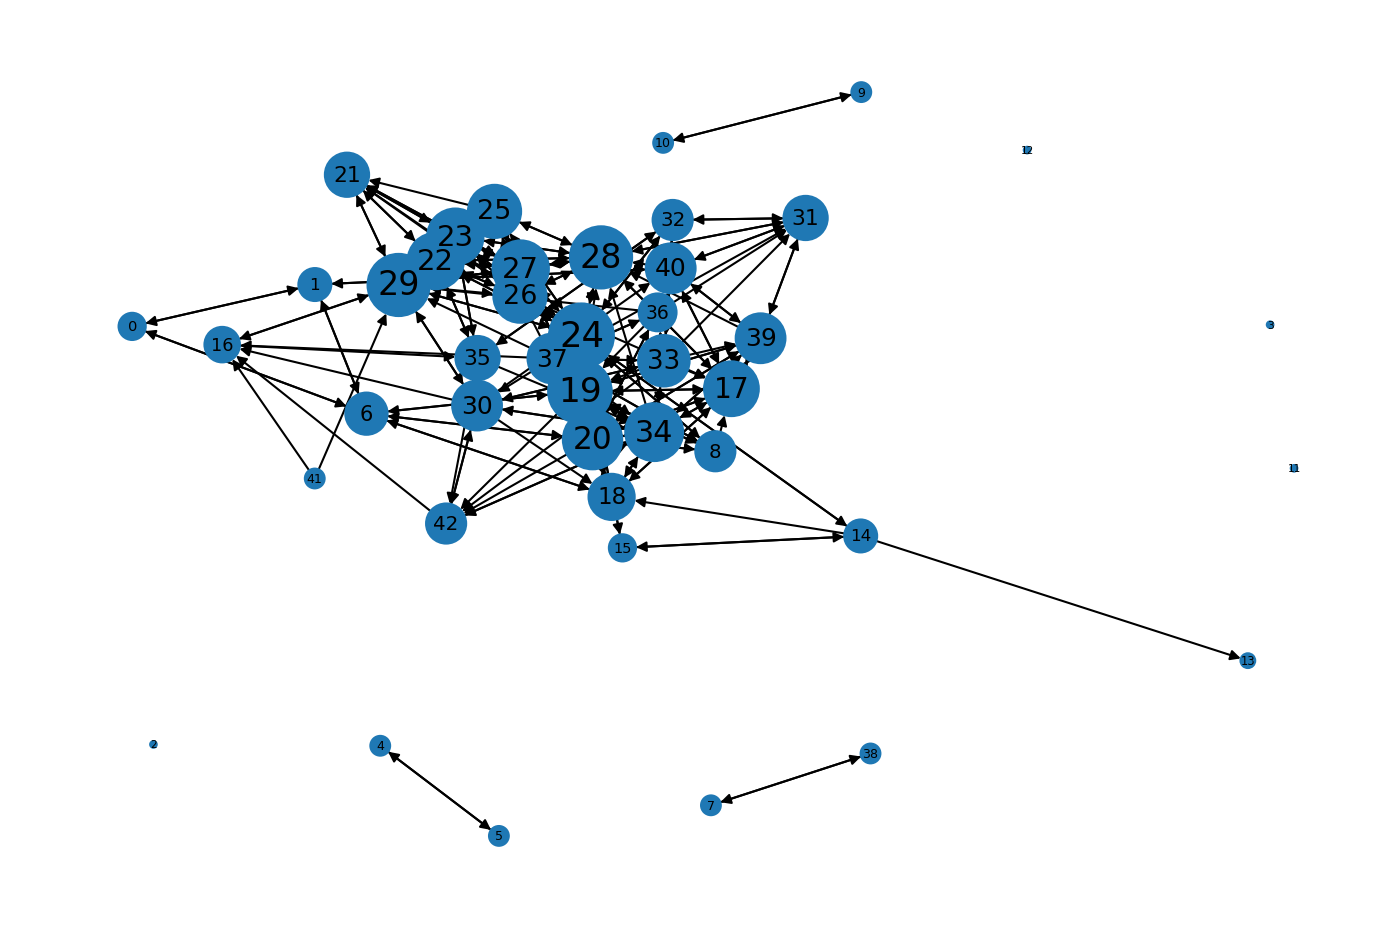

In [4]:
plt.figure(figsize=(9, 6), dpi=150)

pos = nx.fruchterman_reingold_layout(DG_friends, k=0.5, seed=1029)
d = dict(DG_friends.degree)
nx.draw(DG_friends, pos=pos, node_size=[10 + v * 40 for v in d.values()], with_labels=False)
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=5+d[node]*0.5, ha='center', va='center')

plt.show()

### 规则网络和随机网络对比

G_regular  Graph with 16 nodes and 32 edges
G_sw       Graph with 16 nodes and 32 edges
G_random   Graph with 16 nodes and 26 edges



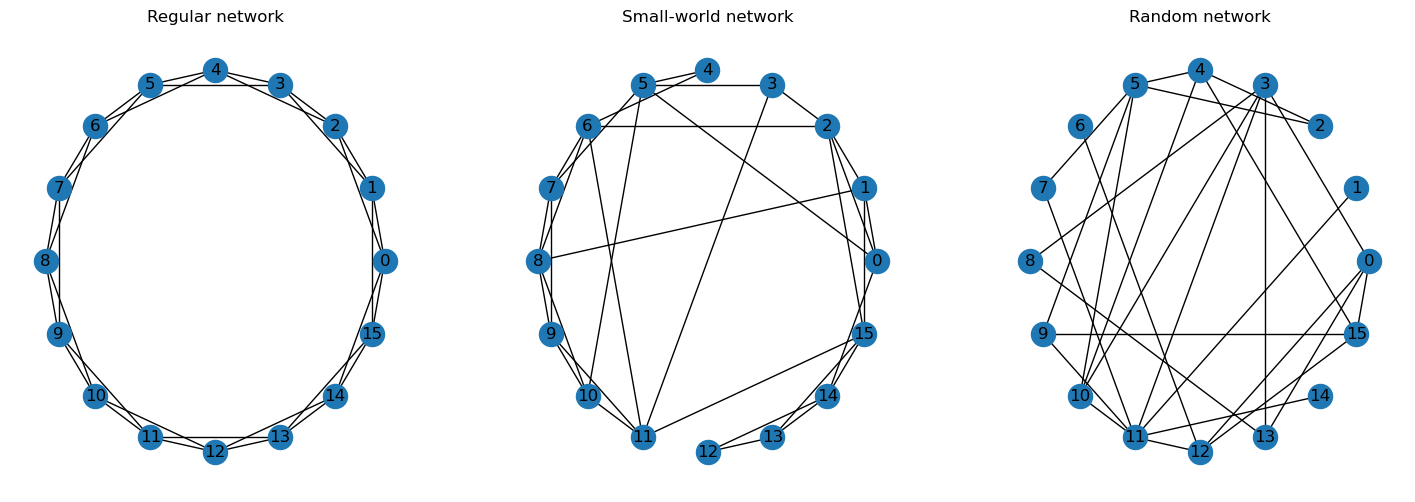

In [6]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3)

G_regular = nx.watts_strogatz_graph(n=16, k=4, p=0.0)
pos = nx.circular_layout(G_regular)
nx.draw(G_regular, pos=pos, with_labels=True, ax=axes[0])
axes[0].set_title('Regular network')

G_sw = nx.watts_strogatz_graph(n=16, k=4, p=0.3)
pos = nx.circular_layout(G_sw)
nx.draw(G_sw, pos=pos, with_labels=True, ax=axes[1])
axes[1].set_title('Small-world network')

G_random = nx.gnp_random_graph(n=16, p=0.26)
pos = nx.circular_layout(G_random)
nx.draw(G_random, pos=pos, with_labels=True, ax=axes[2])
axes[2].set_title('Random network')

print('G_regular ', nx.info(G_regular))
print('G_sw      ', nx.info(G_sw))
print('G_random  ', nx.info(G_random))
print()

plt.show()

### 网络并可视化

In [5]:
n = 43
k = 6

In [6]:
G_sw = nx.watts_strogatz_graph(n, k, p = 0.3)
print(nx.info(G_friends))
print(nx.info(G_sw))

Graph with 43 nodes and 130 edges
Graph with 43 nodes and 129 edges


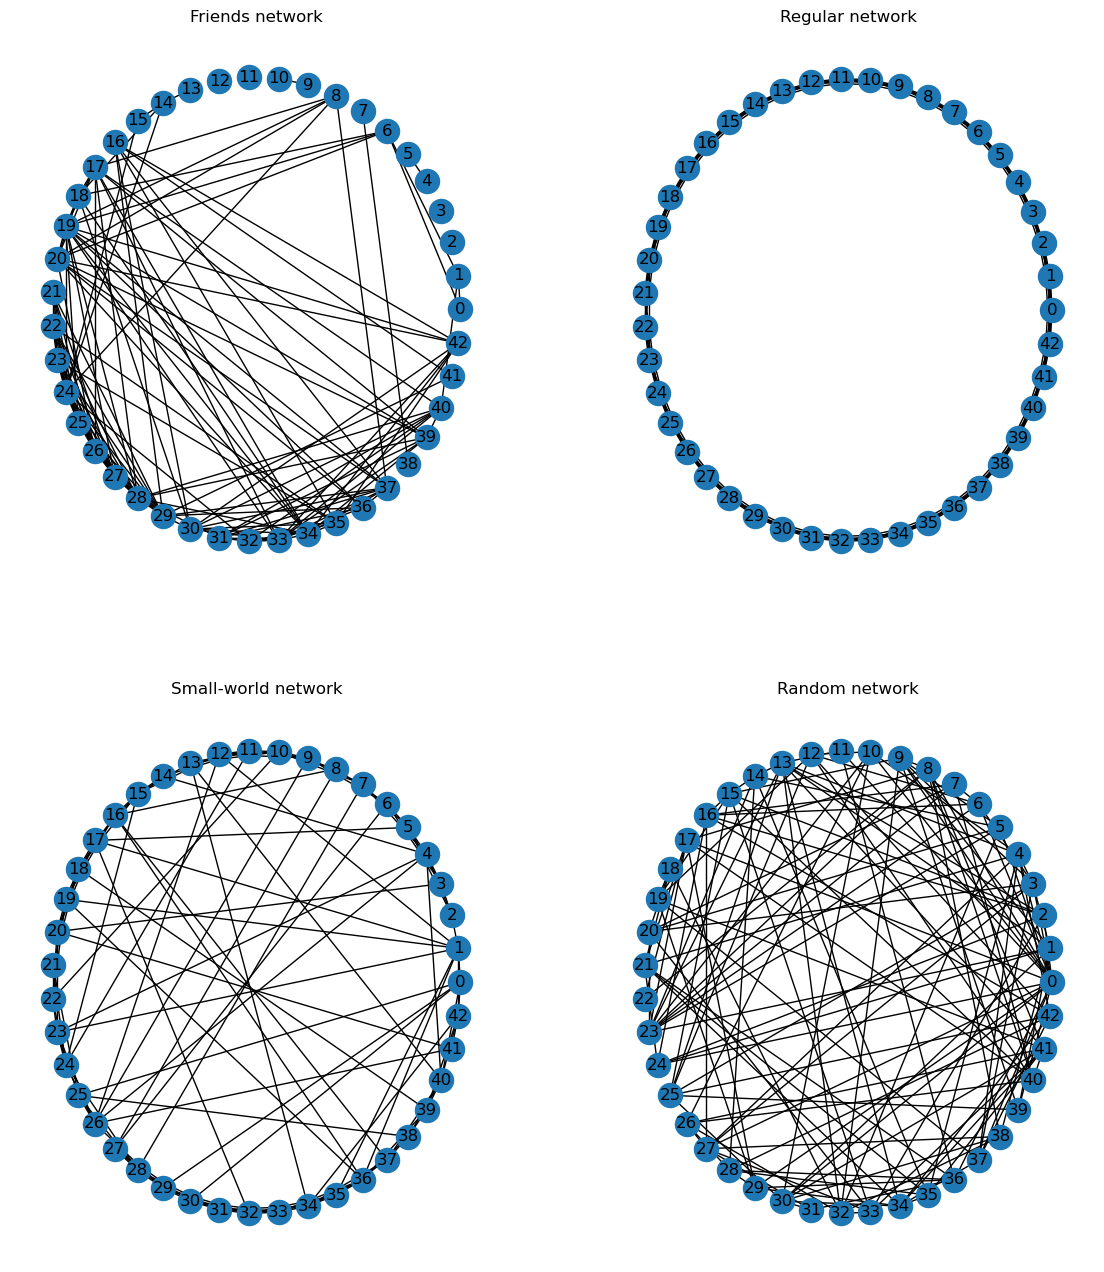

In [7]:
fig, axes = plt.subplots(figsize=(14, 16), nrows=2, ncols=2)

pos = nx.circular_layout(G_friends)
nx.draw(G_friends, pos=pos, with_labels=True, ax=axes[0, 0])
axes[0, 0].set_title('Friends network')

G_regular = nx.watts_strogatz_graph(n=43, k=6, p=0.0)
pos = nx.circular_layout(G_regular)
nx.draw(G_regular, pos=pos, with_labels=True, ax=axes[0, 1])
axes[0, 1].set_title('Regular network')

G_sw = nx.watts_strogatz_graph(n=43, k=6, p=0.3)
pos = nx.circular_layout(G_sw)
nx.draw(G_sw, pos=pos, with_labels=True, ax=axes[1, 0])
axes[1, 0].set_title('Small-world network')

G_random = nx.gnp_random_graph(n=43, p=0.14)
pos = nx.circular_layout(G_random)
nx.draw(G_random, pos=pos, with_labels=True, ax=axes[1, 1])
axes[1, 1].set_title('Random network')

plt.show()

### 度分布

**【以上四个网络度分布之间的区别？】**

In [8]:
print(nx.info(G_regular))
print(nx.info(G_sw))
print(nx.info(G_random))
print(nx.info(G_friends))

Graph with 43 nodes and 129 edges
Graph with 43 nodes and 129 edges
Graph with 43 nodes and 145 edges
Graph with 43 nodes and 130 edges


In [9]:
def plot_degree_distriburion(G, ax, title):

    degree_freq = nx.degree_histogram(G)
    degrees = range(len(degree_freq))

    ax.bar(degrees, degree_freq)
    ax.set_title(title)
    ax.set(xlabel='Degree', ylabel='Frequency')

    ax.label_outer()

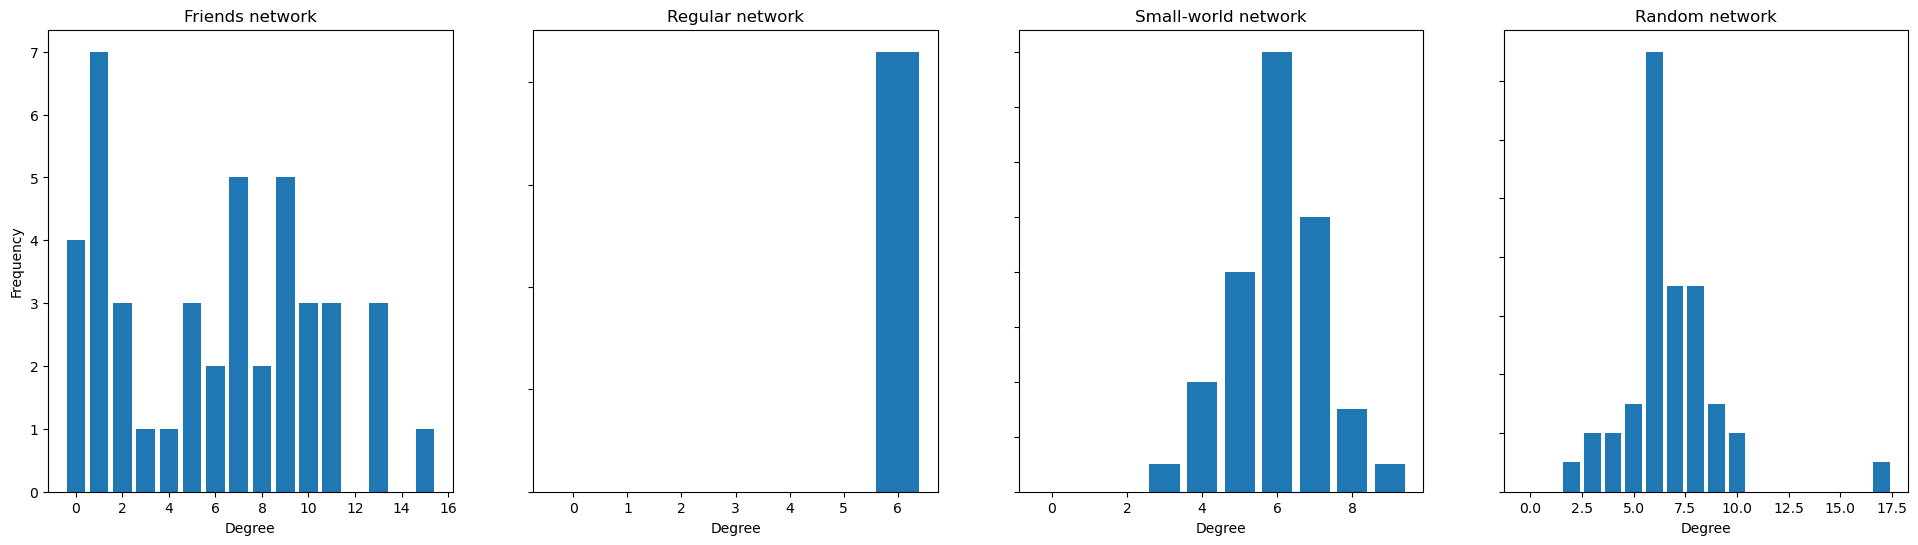

In [10]:
fig, axes = plt.subplots(figsize=(24, 6), nrows=1, ncols=4)

plot_degree_distriburion(G_friends, axes[0], 'Friends network')
plot_degree_distriburion(G_regular, axes[1], 'Regular network')
plot_degree_distriburion(G_sw, axes[2], 'Small-world network')
plot_degree_distriburion(G_random, axes[3], 'Random network')

plt.show()

### 连通性

**【规则网络的连通性？】**  
**【小世界网络的连通性和哪个参数有关？】**

In [11]:
n=100
k=3
p=0.3

G_sw_eg = nx.watts_strogatz_graph(n, k, p)
print(nx.info(G_sw_eg))
print(f"p = {p:.2f}")
print(f'Is small-world network connected? : {nx.is_connected(G_sw_eg)}') 

Graph with 100 nodes and 100 edges
p = 0.30
Is small-world network connected? : True


### 同配性 Assortative

In [12]:
def plot_assortative(G, ax, title):

    degree1 = []
    degree2 = []

    for v in G:
        for neighbor in G.neighbors(v):
            degree1.append(G.degree(v))
            degree2.append(G.degree(neighbor))

    data = pd.DataFrame({'degree1': degree1,
                         'degree2': degree2})

    sns.regplot(x='degree1', y='degree2', data=data, ax=ax)
    ax.set_title(title)

    ax.label_outer()

**【如何解释斜率的正负？】**

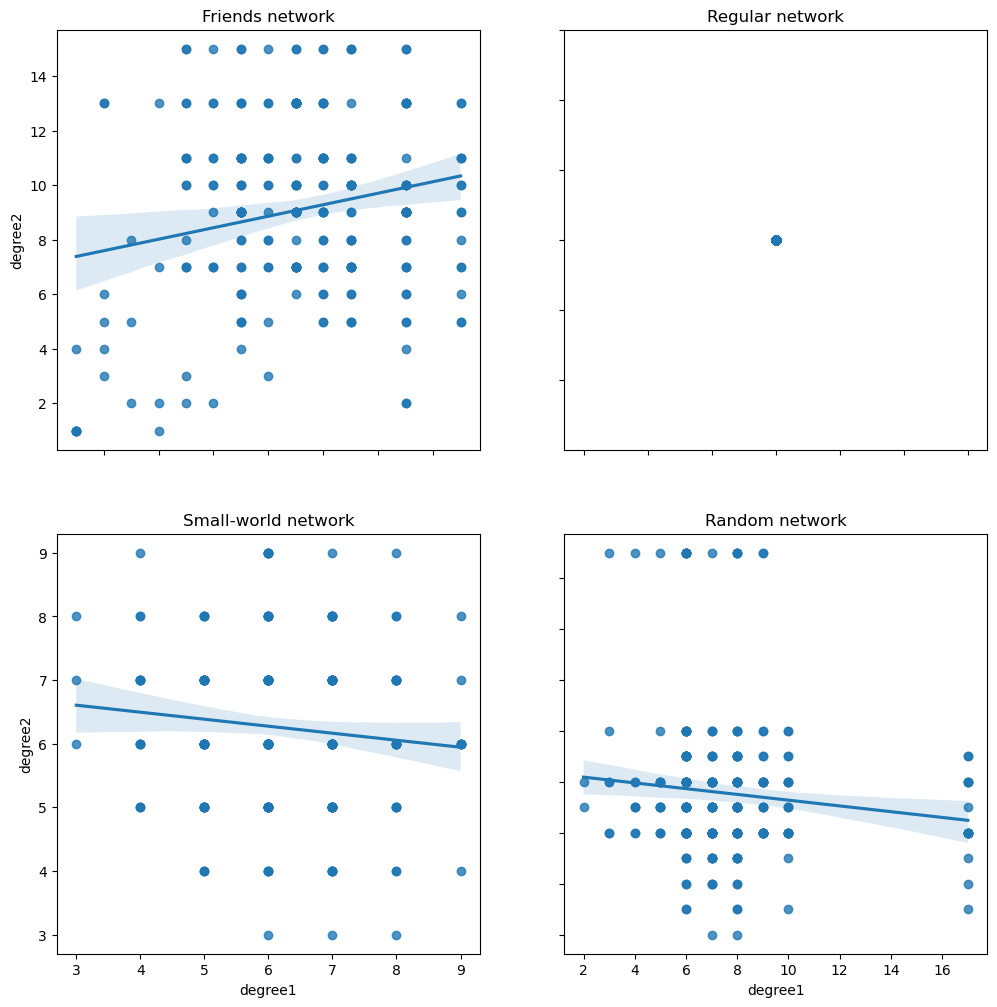

In [13]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=2, ncols=2)

plot_assortative(G_friends, axes[0, 0], 'Friends network')
plot_assortative(G_regular, axes[0, 1], 'Regular network')
plot_assortative(G_sw, axes[1, 0], 'Small-world network')
plot_assortative(G_random, axes[1, 1], 'Random network')

plt.show()

### 平均距离

**【为什么不能计算原网络的距离？而是计算最大连通集团（GCC）的距离？】**

In [14]:
# consider the connected component

largest_cc = max(nx.connected_components(G_friends), key=len)
Gcc_friends = G_friends.subgraph(largest_cc)
print(f"班级好友网络的平均距离为 {nx.average_shortest_path_length(Gcc_friends):.2f}")

largest_cc = max(nx.connected_components(G_regular), key=len)
Gcc_regular = G_regular.subgraph(largest_cc)
print(f"规则网络的平均距离为    {nx.average_shortest_path_length(Gcc_regular):.2f}")

largest_cc = max(nx.connected_components(G_sw), key=len)
Gcc_sw = G_sw.subgraph(largest_cc)
print(f"小世界网络的平均距离为  {nx.average_shortest_path_length(Gcc_sw):.2f}")

largest_cc = max(nx.connected_components(G_random), key=len)
Gcc_random = G_sw.subgraph(largest_cc)
print(f"随机网络的平均距离为    {nx.average_shortest_path_length(Gcc_random):.2f}")

班级好友网络的平均距离为 2.06
规则网络的平均距离为    4.00
小世界网络的平均距离为  2.34
随机网络的平均距离为    2.34


**【结论：在平均距离层面，小世界网络、随机网络与实证网络相符，规则网络不相符】**  

### 7. 集聚系数 Clustering

In [15]:
print(f"班级好友网络的平均集聚系数为 {nx.average_clustering(G_friends):.2f}")
print(f"规则网络的平均集聚系数为    {nx.average_clustering(G_regular):.2f}")
print(f"小世界网络的平均集聚系数为  {nx.average_clustering(G_sw):.2f}")
print(f"随机网络的平均集聚系数为    {nx.average_clustering(G_random):.2f}")

班级好友网络的平均集聚系数为 0.41
规则网络的平均集聚系数为    0.60
小世界网络的平均集聚系数为  0.25
随机网络的平均集聚系数为    0.18


**【结论：在集聚系数层面，小世界网络、规则网络与实证网络相符，随机网络不相符】**  

### 8. 高集聚 & 低距离

In [16]:
def small_world_network_clustering_distance(n, k, p):
    
    G_sw = nx.watts_strogatz_graph(n, k, p)
    largest_cc = max(nx.connected_components(G_sw), key=len)
    Gcc_sw = G_sw.subgraph(largest_cc)
    
    cc = nx.average_clustering(Gcc_sw)
    distance = nx.average_shortest_path_length(Gcc_sw)
    
    return cc, distance

In [17]:
n = 200
k = 4

p_list = []
value_list = []
type_list = []

for p in tqdm(np.arange(0.001, 1, 0.005)):

    cc, distance = small_world_network_clustering_distance(n, k, p)

    value_list.append(cc)
    p_list.append(p)
    type_list.append('cc')

    value_list.append(distance)
    p_list.append(p)
    type_list.append('distance')

100%|██████████| 200/200 [00:48<00:00,  4.09it/s]


In [18]:
df = pd.DataFrame({'p': p_list,
                   'value': value_list, 
                   'type': type_list})

d_max = max(df[df['type']=='distance']['value'])
d_min = min(df[df['type']=='distance']['value'])
cc_max = max(df[df['type']=='cc']['value'])
cc_min = min(df[df['type']=='cc']['value'])

df['value'][df['type']=='distance'] = (df['value'][df['type']=='distance']-d_min) / (d_max-d_min)
df['value'][df['type']=='cc'] = (df['value'][df['type']=='cc']-cc_min) / (cc_max-cc_min)

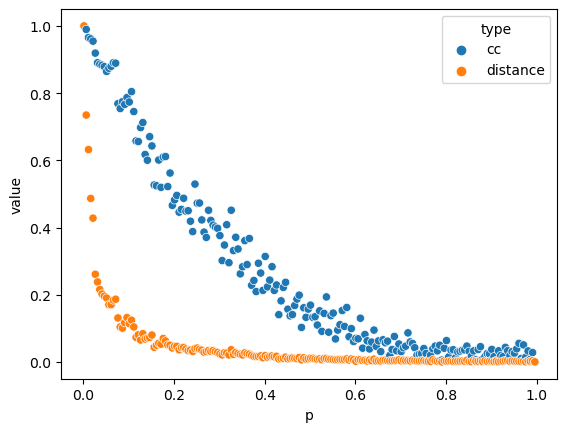

In [19]:
sns.scatterplot(x='p', y='value', hue='type', data=df)
plt.show()

<div align=center>
<img src="pics/small_network_distance_cc.png" width=350 />
</div>

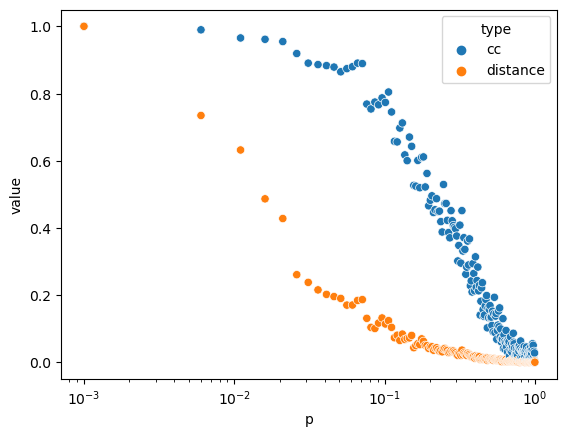

In [20]:
# 对数坐标轴
fig, ax = plt.subplots()
ax.set(xscale="log")
sns.scatterplot(x='p', y='value', hue='type', data=df)
plt.show()

### 9. 自我网络 Ego network

In [21]:
def plot_ego_network(G, n, ax, title):
    
    nodes_ego = list(nx.ego_graph(G, n, radius=1))
    G_ego = G.subgraph(nodes_ego)
    
    cc = nx.clustering(G)[n]
    
    pos=nx.fruchterman_reingold_layout(G_ego, seed=1028)
    d = dict(G_ego.degree)

    nx.draw(G_ego, pos=pos, node_size=[v * 100 for v in d.values()], with_labels=True, ax=ax)
    ax.set_title('%s, cc=%.3f' % (title, cc))

**【四个 ego netowork 有何特点？】**

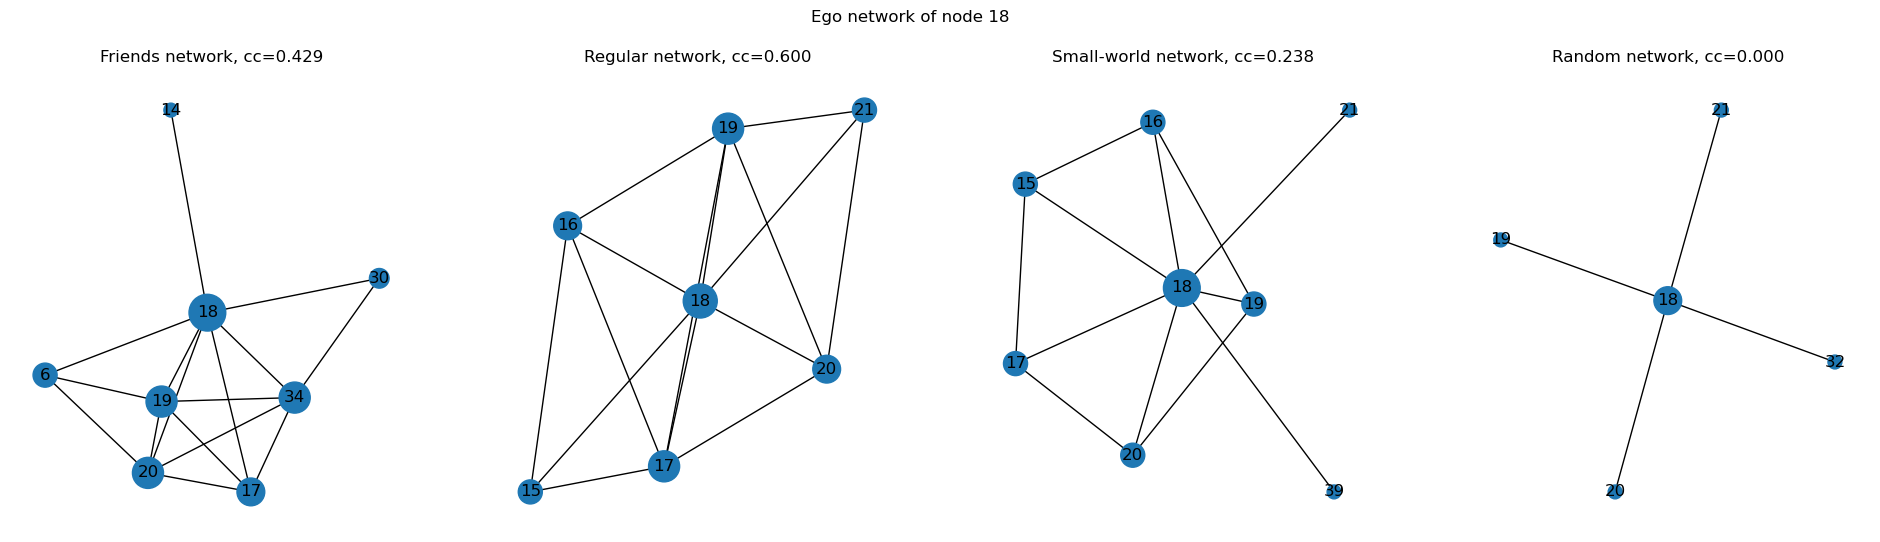

In [22]:
n = 18

fig, axes = plt.subplots(figsize=(24, 6), nrows=1, ncols=4)
plt.suptitle('Ego network of node %d' % n)

plot_ego_network(G_friends, n, axes[0], 'Friends network')
plot_ego_network(G_regular, n, axes[1], 'Regular network')
plot_ego_network(G_sw, n, axes[2], 'Small-world network')
plot_ego_network(G_random, n, axes[3], 'Random network')

plt.show()